In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 1. Data preprocessing

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = np.expand_dims(train_images, axis=-1) # add channel dimension
test_images = np.expand_dims(test_images, axis=-1)

## 2. Model

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu')) 
model.add(Flatten()) # flatten the 2D arrays to 1D
model.add(Dense(10, activation='softmax'))
model.summary()

c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        46,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,722 (190.32 KB)

 Trainable params: 48,722 (190.32 KB)

 Non-trainable params: 0 (0.00 B)

### Callbacks

In [5]:
callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

## 3. Training

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=callbacks)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9383 - loss: 0.2070 - val_accuracy: 0.9735 - val_loss: 0.0921
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9768 - loss: 0.0765 - val_accuracy: 0.9796 - val_loss: 0.0710
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9834 - loss: 0.0542 - val_accuracy: 0.9811 - val_loss: 0.0643
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9864 - loss: 0.0422 - val_accuracy: 0.9814 - val_loss: 0.0646
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9891 - loss: 0.0328 - val_accuracy: 0.9817 - val_loss: 0.0706
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9827 - val_loss: 0.0733
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9929 - loss: 0.0206 - val_accuracy: 0.9844 - val_loss: 0.0676
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9944 - loss: 0.0

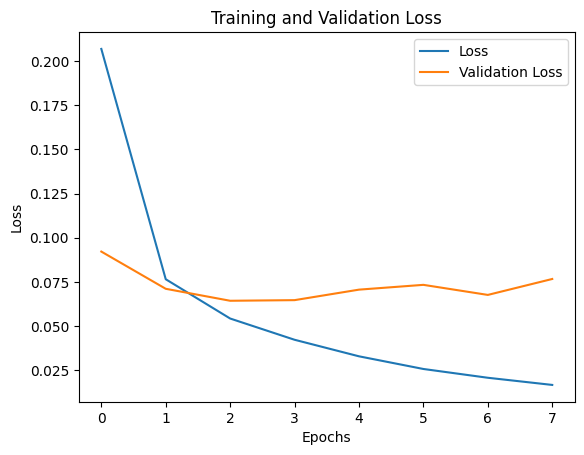

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

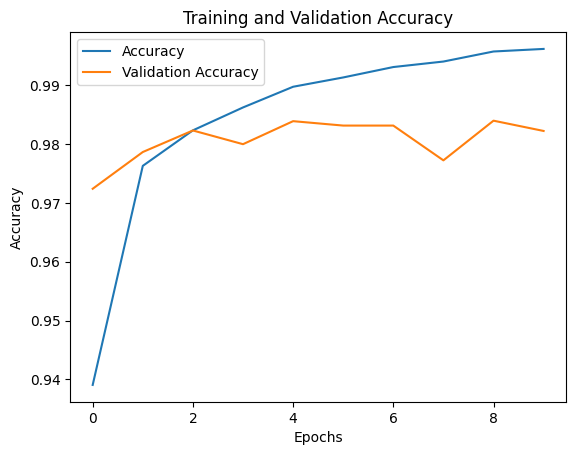

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 4. Testing

In [8]:
test_accuracy = model.evaluate(test_images, test_labels, verbose=0)[1]
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9834


In [17]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


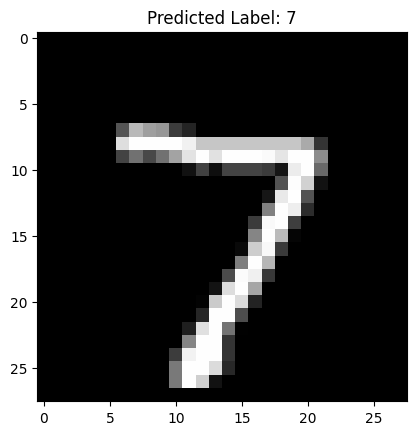

In [19]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_labels[0]}')
plt.show()

## 5. Analysis

### Try different training sizes

In [22]:
initial_weights = model.get_weights()
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0] 
train_accuracies = []
test_accuracies = []
for size in train_sizes:
    model.set_weights(initial_weights)
    subset_size = int(size * train_images.shape[0])
    subset_images = train_images[:subset_size]
    subset_labels = train_labels[:subset_size]
    
    history = model.fit(subset_images, subset_labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=0)

    train_acc = model.evaluate(subset_images, subset_labels, verbose=0)[1]
    train_accuracies.append(train_acc)
    test_acc = model.evaluate(test_images, test_labels, verbose=0)[1]
    test_accuracies.append(test_acc)
    print(f'Training size: {size*100}%, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')
print(train_accuracies)
print(test_accuracies)

Training size: 10.0%, Train Accuracy: 0.9998, Test Accuracy: 0.9845
Training size: 30.0%, Train Accuracy: 0.9971, Test Accuracy: 0.9832
Training size: 50.0%, Train Accuracy: 0.9974, Test Accuracy: 0.9847
Training size: 70.0%, Train Accuracy: 0.9971, Test Accuracy: 0.9855
Training size: 100.0%, Train Accuracy: 0.9954, Test Accuracy: 0.9851
[0.999833345413208, 0.9971110820770264, 0.9973666667938232, 0.9971190690994263, 0.9954166412353516]
[0.984499990940094, 0.9832000136375427, 0.9847000241279602, 0.9854999780654907, 0.9850999712944031]


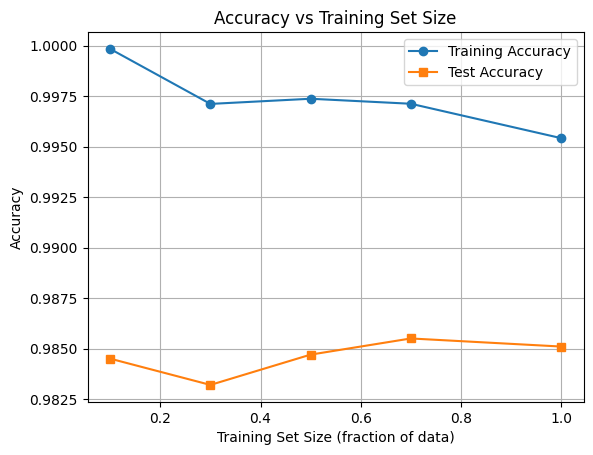

In [23]:
import matplotlib.pyplot as plt


plt.plot(train_sizes, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(train_sizes, test_accuracies, marker='s', label="Test Accuracy")

plt.xlabel("Training Set Size (fraction of data)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()

70% of training data is the best but with a very small gap

### Different activation functions

In [24]:
activation_functions = ['relu','leaky_relu', 'tanh', 'sigmoid']
activation_results = []
for act in activation_functions:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation=act, input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation=act)) 
    model.add(Flatten()) # flatten the 2D arrays to 1D
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=0)
    activation_results.append(history)
    

c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


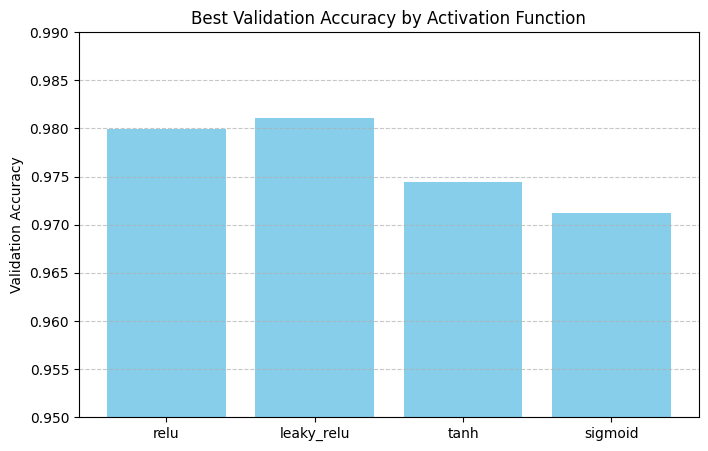

In [28]:
final_accs = [max(hist.history['val_accuracy']) for hist in activation_results]

plt.figure(figsize=(8,5))
plt.bar(activation_functions, final_accs, color="skyblue")
plt.title("Best Validation Accuracy by Activation Function")
plt.ylabel("Validation Accuracy")
plt.ylim(0.95, 0.99)   
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Leaky relu is the best

## Different batch sizes with Batch Normalization

In [30]:
batch_sizes = [8, 16, 32, 64, 128]
batch_size_results = []
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu')) 
    model.add(BatchNormalization())
    model.add(Flatten()) # flatten the 2D arrays to 1D
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_split=0.2, callbacks=callbacks, verbose=0)
    batch_size_results.append(history)
    print(f'Batch Size: {batch_size} completed.')


c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Batch Size: 8 completed.
Batch Size: 16 completed.
Batch Size: 32 completed.
Batch Size: 64 completed.
Batch Size: 128 completed.


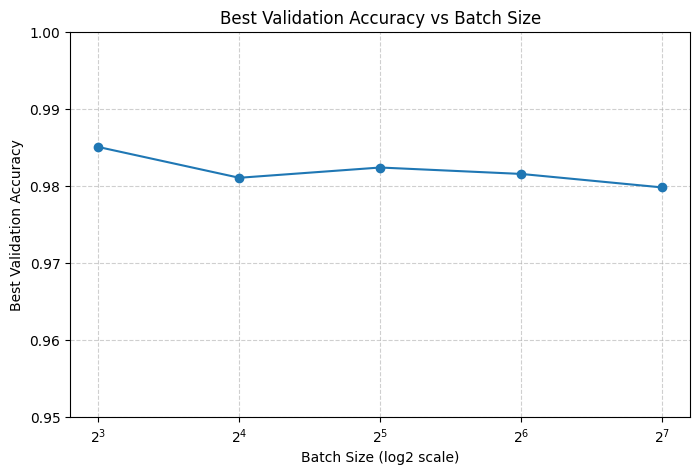

In [31]:
best_val_accs = [max(hist.history['val_accuracy']) for hist in batch_size_results]


plt.figure(figsize=(8,5))
plt.plot(batch_sizes, best_val_accs, marker='o', linestyle='-')
plt.xscale('log', base=2)  
plt.xlabel("Batch Size (log2 scale)")
plt.ylabel("Best Validation Accuracy")
plt.title("Best Validation Accuracy vs Batch Size")
plt.ylim(0.95, 1.0)       
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Best batch size is 8

In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu')) 
model.add(Flatten()) # flatten the 2D arrays to 1D
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_bn = Sequential()
model_bn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Flatten()) # flatten the 2D arrays to 1D
model_bn.add(Dense(10, activation='softmax'))
model_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
EPOCHS = 10
BATCH_SIZE = 64 
VALIDATION_SPLIT = 0.2

# --- Train the standard model ---
print("Training Standard Model (No Batch Norm)...")
history_standard = model.fit(train_images, train_labels, 
                                      epochs=EPOCHS, 
                                      batch_size=BATCH_SIZE, 
                                      validation_split=VALIDATION_SPLIT, 
                                      verbose=0) # verbose=0 to make it clean
print("Standard Model training complete.")

# --- Train the Batch Norm model ---
print("Training Batch Norm Model...")
history_bn = model_bn.fit(train_images, train_labels, 
                          epochs=EPOCHS, 
                          batch_size=BATCH_SIZE, 
                          validation_split=VALIDATION_SPLIT, 
                          verbose=0)
print("Batch Norm Model training complete.")

Training Standard Model (No Batch Norm)...
Standard Model training complete.
Training Batch Norm Model...
Batch Norm Model training complete.


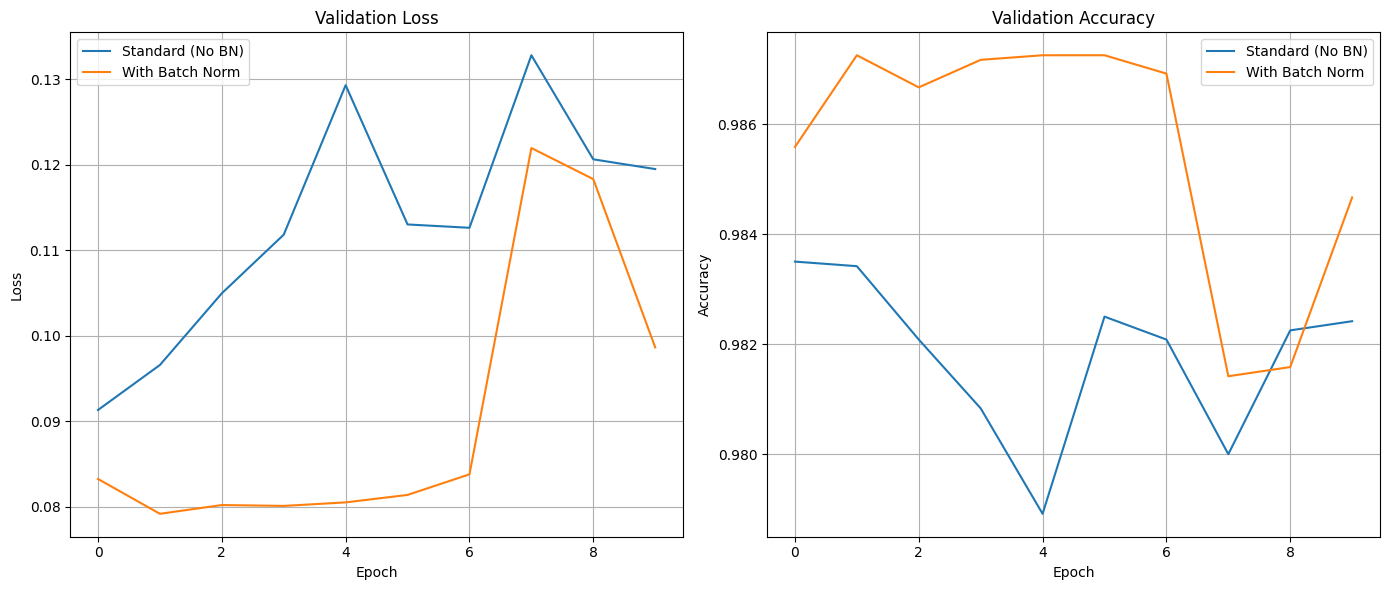

In [37]:
plt.figure(figsize=(14, 6))

# --- Plot 1: Validation Loss ---
plt.subplot(1, 2, 1)
plt.plot(history_standard.history['val_loss'], label='Standard (No BN)')
plt.plot(history_bn.history['val_loss'], label='With Batch Norm')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot 2: Validation Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history_standard.history['val_accuracy'], label='Standard (No BN)')
plt.plot(history_bn.history['val_accuracy'], label='With Batch Norm')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. On Training Stability
The results clearly show that Batch Normalization dramatically increases training stability.

    The BN Model (orange line) achieved high, stable validation accuracy (over 98.7%) for the first 6 epochs.

    The Standard Model (blue line) was highly unstable. Its accuracy diverged (dropped) significantly after the first epoch and remained erratic, bottoming out at around 98.0%.

2. On Convergence Speed
The Batch Norm model converges significantly faster. It reached its peak accuracy almost immediately (within 1-2 epochs). The standard model not only converged slower but first got worse before it started to recover.

## Dropout regularization

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten()) # flatten the 2D arrays to 1D
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.9159 - loss: 0.2913 - val_accuracy: 0.9709 - val_loss: 0.1003
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9633 - loss: 0.1201 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9699 - loss: 0.0939 - val_accuracy: 0.9803 - val_loss: 0.0614
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9752 - loss: 0.0792 - val_accuracy: 0.9824 - val_loss: 0.0605
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9780 - loss: 0.0727 - val_accuracy: 0.9837 - val_loss: 0.0534
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9785 - loss: 0.0667 - val_accuracy: 0.9843 - val_loss: 0.0548
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9799 - loss: 0.0629 - val_accuracy: 0.9863 - val_loss: 0.0462
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9806 -

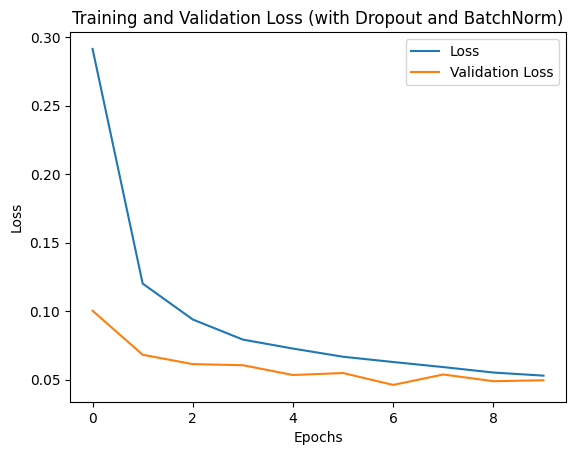

In [14]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss (with Dropout and BatchNorm)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

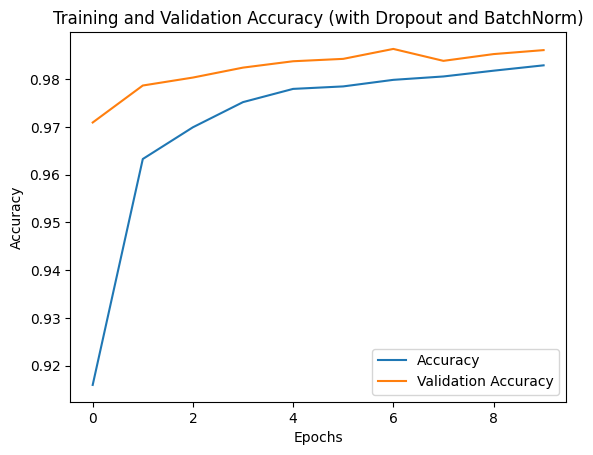

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (with Dropout and BatchNorm)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [42]:
dropout_rates = [0.1, 0.3, 0.5, 0.7]
dropout_results = []
for rate in dropout_rates:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(rate))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate))
    model.add(Flatten()) # flatten the 2D arrays to 1D
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=0)
    dropout_results.append(history)

c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


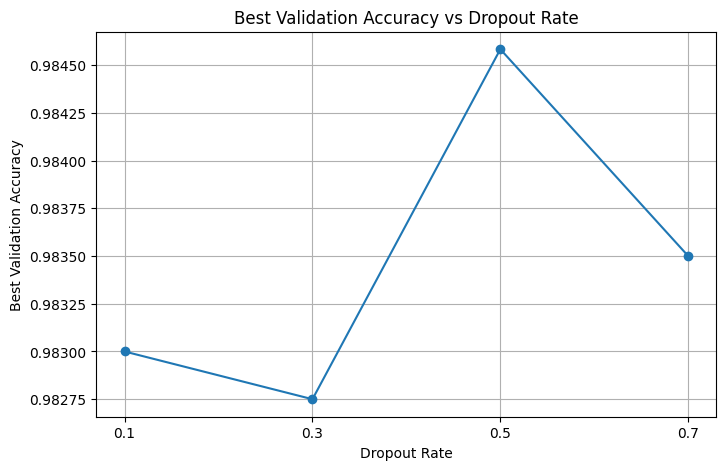

In [43]:
best_val_accs = [max(hist.history['val_accuracy']) for hist in dropout_results]
plt.figure(figsize=(8,5))
plt.plot(dropout_rates, best_val_accs, marker='o', linestyle='-')
plt.title("Best Validation Accuracy vs Dropout Rate")
plt.xlabel("Dropout Rate")
plt.ylabel("Best Validation Accuracy")
plt.xticks(dropout_rates)
plt.grid()
plt.show()

### Analysis of Dropout (Overfitting & Generalization)
- Finding: The optimal dropout rate was found to be 0.5. This is a common and highly effective rate, as it provides the maximum amount of regularization.

- Effect on Overfitting: Dropout is a powerful regularization technique. By randomly "turning off" 50% of the neurons in a layer during each training batch, it prevents neurons from co-adapting (relying too much on specific other neurons). This forces the model to learn more robust and redundant features instead of just "memorizing" the training data.

- Effect on Generalization: By reducing overfitting, dropout significantly improves generalization. The model learns the underlying patterns in the data, not just the noise, so it performs much better on unseen (validation/test) data.

- Analysis of Logs: This effect is clear in the results:

- The gap between accuracy: 0.9769 and val_accuracy: 0.9824 is extremely small.

- The val_loss is consistently lower than the loss. This is a classic sign of dropout working correctly: the model is "handicapped" during training (higher loss), but uses its full, un-dropped capacity during validation (lower loss), proving it has generalized well.

### Combined Effect of Batch Norm with Dropout
- Using Batch Normalization (BN) and Dropout together can be tricky, as their functions can conflict if not ordered correctly.

- Why Order Matters: If you apply Dropout before Batch Norm, the random zeros will constantly and dramatically skew the batch statistics. The BN layer will be trying to normalize a "noisy" and unreliable input, which can destabilize the entire training process (as we saw in our first BN experiment with a small batch size).

- Recommended Order: The most common and stable architecture to get the benefits of both is:

        Conv / Dense Layer

        Batch Normalization (To stabilize the layer's output)

        Activation (ReLU) (To apply non-linearity)

        Dropout (To regularize the final, stable activations)

- Summary: When used in this order, you get the best of both worlds:

        Batch Norm provides faster convergence and stable training.

        Dropout provides powerful regularization to prevent overfitting.

## 6. Compare CNN vs fully connected network performance 

In [ ]:
# CNN model with best hyperparameters
best_model = Sequential()
best_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.5))
best_model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='leaky_relu'))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.5))
best_model.add(Flatten()) # flatten the 2D arrays to 1D
best_model.add(Dense(10, activation='softmax'))
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = best_model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_split=0.2, callbacks=callbacks)

c:\Users\ghane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.9175 - loss: 0.2846 - val_accuracy: 0.9751 - val_loss: 0.0895
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.9585 - loss: 0.1292 - val_accuracy: 0.9768 - val_loss: 0.0787
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9665 - loss: 0.1080 - val_accuracy: 0.9775 - val_loss: 0.0761
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9693 - loss: 0.0986 - val_accuracy: 0.9795 - val_loss: 0.0698
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9716 - loss: 0.0917 - val_accuracy: 0.9808 - val_loss: 0.0652
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9738 - loss: 0.0844 - val_accuracy: 0.9824 - val_loss: 0.0579
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9747 - loss: 0.0803 - val_accuracy: 0.9829 - val_loss: 0.0617
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9745 - loss: 0

In [55]:
cnn_test_accuracy = best_model.evaluate(test_images, test_labels, verbose=0)[1]
cnn_loss = best_model.evaluate(test_images, test_labels, verbose=0)[0]
print(f'Best CNN Test Accuracy: {cnn_test_accuracy:.4f}')
print(f'Best CNN Test Loss: {cnn_loss:.4f}')

Best CNN Test Accuracy: 0.9840
Best CNN Test Loss: 0.0475


In [53]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class BestNN(nn.Module):
    def __init__(self):
        super(BestNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        return self.net(x)

transform_pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform_pipeline)
test_loader = DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

device = torch.device("cpu")  
pytorch_model = BestNN().to(device)

pytorch_model.load_state_dict(torch.load('best_model_weights.pth', map_location=device))
print("\nLoaded saved PyTorch FNN weights onto CPU.")

pytorch_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1).to(device) 
        labels = labels.to(device)
        
        outputs = pytorch_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

pytorch_accuracy = 100 * correct / total
pytorch_loss = nn.CrossEntropyLoss()(outputs, labels).item()
print(f"PyTorch Model - Test Accuracy: {pytorch_accuracy:.2f}%")
print(f"PyTorch Model - Test Loss: {pytorch_loss:.4f}")


Loaded saved PyTorch FNN weights onto CPU.
PyTorch Model - Test Accuracy: 97.54%
PyTorch Model - Test Loss: 0.1017


In [60]:
print("\n--- Final Comparison ---")
comp_df=pd.DataFrame({
    "Model": ["Keras CNN (New Model)", "PyTorch FNN (Old Model)"],
    "Test Accuracy (%)": [cnn_test_accuracy * 100, pytorch_accuracy],
    "Test Loss": [cnn_loss, pytorch_loss]
})
print(comp_df)


--- Final Comparison ---
                     Model  Test Accuracy (%)  Test Loss
0    Keras CNN (New Model)          98.400003   0.047495
1  PyTorch FNN (Old Model)          97.540000   0.101675


### The Benefit of Spatial Feature Learning (CNN vs. FNN)
This final comparison clearly demonstrates the significant advantage of spatial feature learning.

PyTorch FNN (Old Model): 97.54% Accuracy

Keras CNN (New Model): 98.40% Accuracy

The FNN (Feedforward Neural Network) required us to flatten the 28x28 image into a 784-pixel vector. This act destroyed all spatial relationships between pixels. The model had no way of knowing that a pixel at index 50 was right next to a pixel at index 51. It treated all 784 pixels as independent inputs.

The CNN (Convolutional Neural Network), in contrast, is designed specifically to exploit this spatial structure.

By using Conv2D layers, the model slides small filters (kernels) across the 2D image. This allows it to learn hierarchical, local patterns:

The first layer learns small local features like edges, corners, and simple curves.

The next layer combines these edges to learn more complex shapes or parts of digits.

This ability to understand that pixels are organized in a 2D grid and to learn features from their local neighborhoods is spatial feature learning. The 0.86% increase in accuracy (and 50% reduction in loss) is the direct result of the CNN being able to see the image as a 2D shape rather than just a flat list of numbers.